<a href="https://colab.research.google.com/github/codeanster/gonzalos_playground/blob/master/Machine_Learning/Stroke_Classification_and_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier


In [9]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df = df.dropna()
df = df.drop(columns=['id'])
keyes = df.keys()
cols = keyes[[0,4,5,6,9]]
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [10]:
# Encode labels of multiple columns at once
le = LabelEncoder()

df[cols]= df[cols].apply(LabelEncoder().fit_transform)

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X) 
#= sc.transform(X_test)

X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)

Feature: 0, Score: 0.82114
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.17886
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000


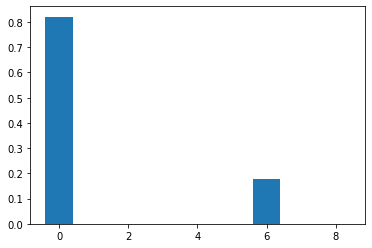

0.9486970684039088

In [11]:
#for decision tree
classifier = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = classifier.predict(X_test) 
cm = confusion_matrix(y_test, dtree_predictions) 

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
accuracy_score(y_test, dtree_predictions)

0.9478827361563518


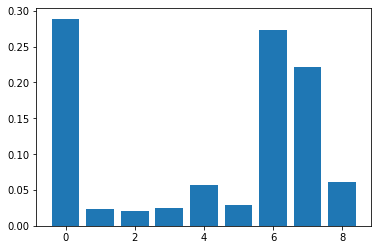

Feature: 0, Score: 0.28894
Feature: 1, Score: 0.02404
Feature: 2, Score: 0.02114
Feature: 3, Score: 0.02421
Feature: 4, Score: 0.05695
Feature: 5, Score: 0.02853
Feature: 6, Score: 0.27321
Feature: 7, Score: 0.22119
Feature: 8, Score: 0.06179


In [12]:
# for Random tree
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred) 
print(accuracy_score(y_test, y_pred))

importance = classifier.feature_importances_
# summarize feature importance
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Accuracy: 0.957 (0.001)


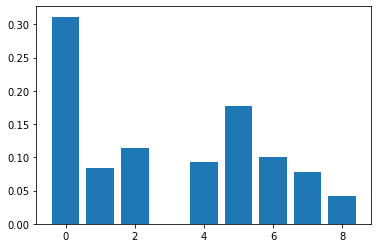

In [13]:
# define the model
model = XGBClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

model.fit(X_train,y_train)
importance = model.feature_importances_
# summarize feature importance
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [14]:
#for k nearest neighbors
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred) 
accuracy_score(y_test, y_pred)

0.9470684039087948

0.9603368639945984 0.9486970901489258


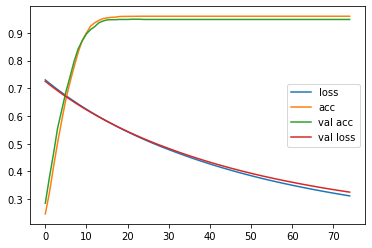

In [20]:
#create tensorflow model of ann
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256,input_shape = (X_train.shape[0],X_train.shape[1]),activation='relu'),
  tf.keras.layers.Dense(128,input_shape = (X_train.shape[0],X_train.shape[1]),activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])



#Compile and fit
opt = tf.keras.optimizers.SGD(0.0001)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])
r = model.fit(X_train,y_train, validation_data = (X_test, y_test),batch_size = 32, epochs=75,verbose=0)

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
print(r.history['accuracy'][-1],r.history['val_accuracy'][-1])